# Лабораторная работа№ 1
## Выполнил: Гневнов А.Е., ИВТ 2.1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

# Загрузка данных
data = pd.read_csv('data/insurance.csv')

### Предобработка данных

In [3]:
# Кодирование категориальных переменных
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})
data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data = pd.get_dummies(data, columns=['region'], drop_first=True)

# Разделение на признаки и целевую переменную
X = data.drop('charges', axis=1)
y = data['charges']

### Задание 1:  Разделение данных

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print(f"Размер тестовой выборки: {len(X_test)} наблюдений")

Размер тестовой выборки: 268 наблюдений


### Задание 2: Обучение линейной регрессии

In [5]:

lr = LinearRegression()
lr.fit(X_train, y_train)

# Свободный член (intercept)
intercept = round(lr.intercept_, 2)
print(f"Свободный член (intercept): {intercept}")

# Функция для расчета метрик
def calc_metrics(model, X, y):
    pred = model.predict(X)
    r2 = r2_score(y, pred)
    mae = mean_absolute_error(y, pred)
    mape = np.mean(np.abs((y - pred) / y)) * 100
    return round(r2, 3), int(mae), int(mape)

# Расчет метрик
train_metrics = calc_metrics(lr, X_train, y_train)
test_metrics = calc_metrics(lr, X_test, y_test)

print(f"Тренировочные данные: R²={train_metrics[0]}, MAE={train_metrics[1]}, MAPE={train_metrics[2]}%")
print(f"Тестовые данные: R²={test_metrics[0]}, MAE={test_metrics[1]}, MAPE={test_metrics[2]}%")

Свободный член (intercept): -11931.22
Тренировочные данные: R²=0.742, MAE=4208, MAPE=42%
Тестовые данные: R²=0.784, MAE=4181, MAPE=46%


### Задание 3: Boxplot ошибок

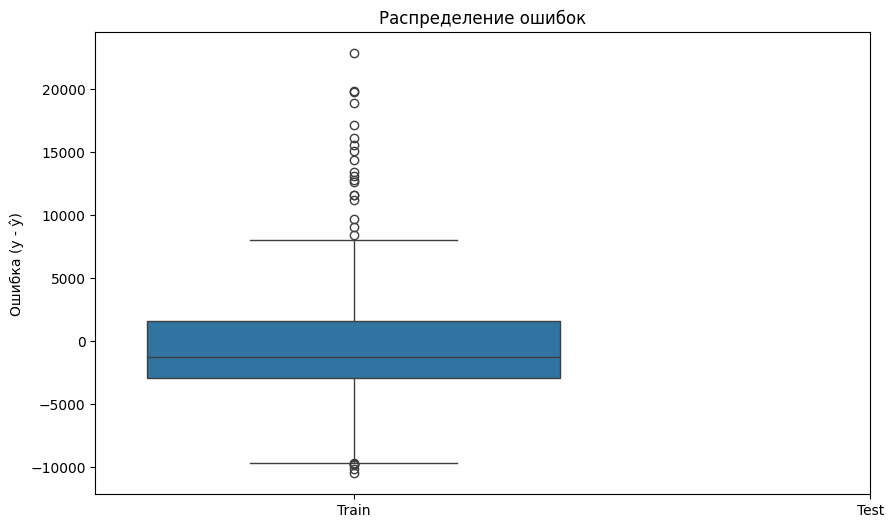

In [6]:
# Расчет ошибок
train_errors = y_train - lr.predict(X_train)
test_errors = y_test - lr.predict(X_test)

# Построение графика
plt.figure(figsize=(10, 6))
sns.boxplot(data=[train_errors, test_errors])
plt.xticks([0, 1], ['Train', 'Test'])
plt.ylabel('Ошибка (y - ŷ)')
plt.title('Распределение ошибок')
plt.show()

### Задание 4: Нормализация и полиномиальные признаки

In [7]:
# MinMax-нормализация
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Генерация полиномиальных признаков
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f"Количество столбцов: {X_train_poly.shape[1]}")

Количество столбцов: 44


### Задание 5: Полиномиальная регрессия

In [8]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

test_r2 = r2_score(y_test, lr_poly.predict(X_test_poly))
print(f"R² на тесте: {round(test_r2, 3)}")

R² на тесте: 0.867


### Задание 6: Анализ коэффициентов

In [9]:
coefs = lr_poly.coef_
print(f"Min коэффициент: {np.min(coefs):.2f}")
print(f"Max коэффициент: {np.max(coefs):.2f}")
print(f"Среднее |coef|: {np.mean(np.abs(coefs)):.2f}")

Min коэффициент: -9711.00
Max коэффициент: 54839.21
Среднее |coef|: 3127.22


Значения коэффициентов очень высокие, модель неустойчива, необходима регуляризация

### Задание 7: Lasso-регрессия

In [10]:
lasso = Lasso(alpha=1.0, max_iter=2000)  # alpha по умолчанию=1.0
lasso.fit(X_train_poly, y_train)

# Метрики на тесте
pred_test = lasso.predict(X_test_poly)
r2 = round(r2_score(y_test, pred_test), 3)
mae = int(mean_absolute_error(y_test, pred_test))
mape = int(np.mean(np.abs((y_test - pred_test) / y_test)) * 100)

print(f"R²={r2}, MAE={mae}, MAPE={mape}%")

R²=0.867, MAE=2716, MAPE=30%
